In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [5]:
pred = tf.add(tf.multiply(X, W), b)

In [6]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

Epoch: 1000 cost= 0.077102557 W= 0.243917 b= 0.842303
Optimization Finished!
Training const= 0.0771026 W= 0.243917 b= 0.842303 



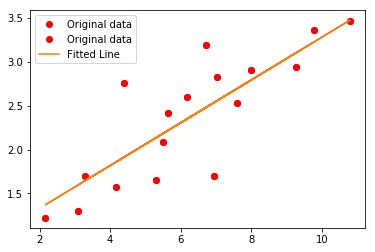

In [14]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
        print("Epoch:", "%04d" %(epoch+1), "cost=", "{:.9f}".format(c),\
              "W=", sess.run(W), "b=", sess.run(b))
        
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print("Training const=", training_cost, "W=", sess.run(W),
          "b=", sess.run(b), "\n")
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()